In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from config.dl_model_config import DLModelConfig

from ipsqt.prediction.dl.dl_predictor import DLClassifier as Predictor
from ipsqt.prediction.dl.models.mlp import MLPClassifier as Model
from ipsqt.strategies.predicted.momentum_reversal_strategy import (
    MomentumReversalStrategy as Strategy,
)

from run import initialize

In [3]:
REBAL_FREQ = "D"
RETRAIN = True
SAVE = True

In [4]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.n_features = len(runner.available_features)
model_config.n_classes = 2

model_config.n_epochs = 20

predictor = Predictor(
    model_cls=Model,
    model_config=model_config,
    verbose=False,
)

strategy = Strategy(
    predictor=predictor,
    retrain=RETRAIN,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 2013-03-24 00:00:00 to 2024-05-05 00:00:00
Num Train Iterations: 581
Num OOS Daily Points: 581


In [5]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights: 100%|██████████| 581/581 [06:10<00:00,  1.57it/s]


In [6]:
result

StrategyStatistics:
* final_nav = 4.101430
* geom_avg_total_r = 0.134640
* geom_avg_xs_r = 0.121007
* std_xs_r = 0.163635
* min_xs_r = -0.149641
* max_xs_r = 0.126046
* skew = -0.255603
* kurtosis = 7.039071
* max_dd = -0.310846
* sharpe = 0.739493
* alpha_buy_hold = -0.006970
* tracking_error_buy_hold = 0.126225
* ir_buy_hold = -0.055222
* factor_loadings = {'_MKT': 0.7017032133377715}
* alpha_benchmark = 0.029643
* alpha_benchmark_pvalue = 0.343283
* tracking_error_benchmark = 0.116410
* ir_benchmark = 0.254646
* ttest_pval = 0.535934
* levene_pval = 0.899195
* timing_ability_coef = 0.270621
* timing_ability_pval = 0.000982

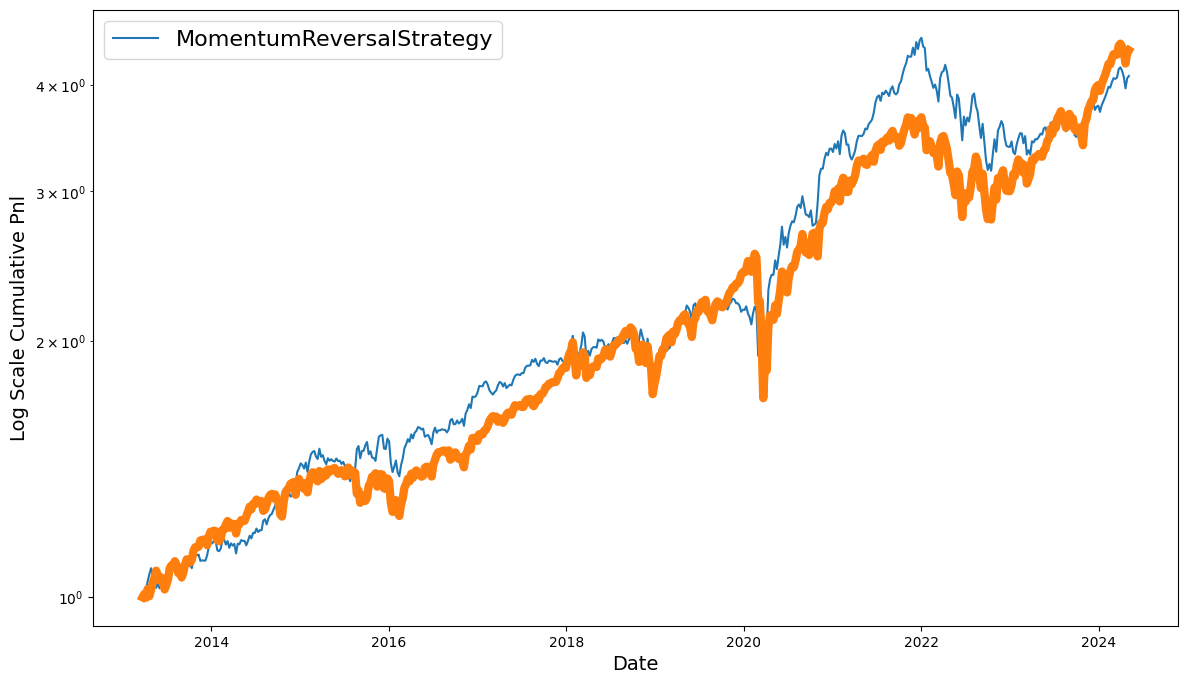

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

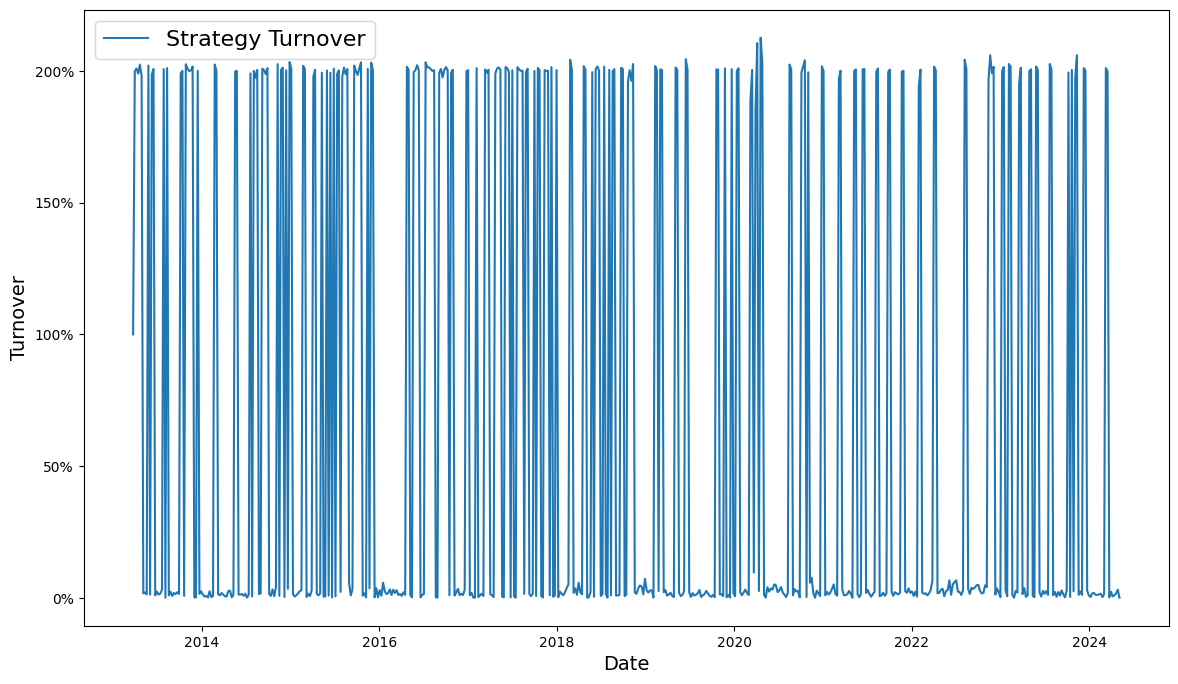

In [8]:
runner.plot_turnover()

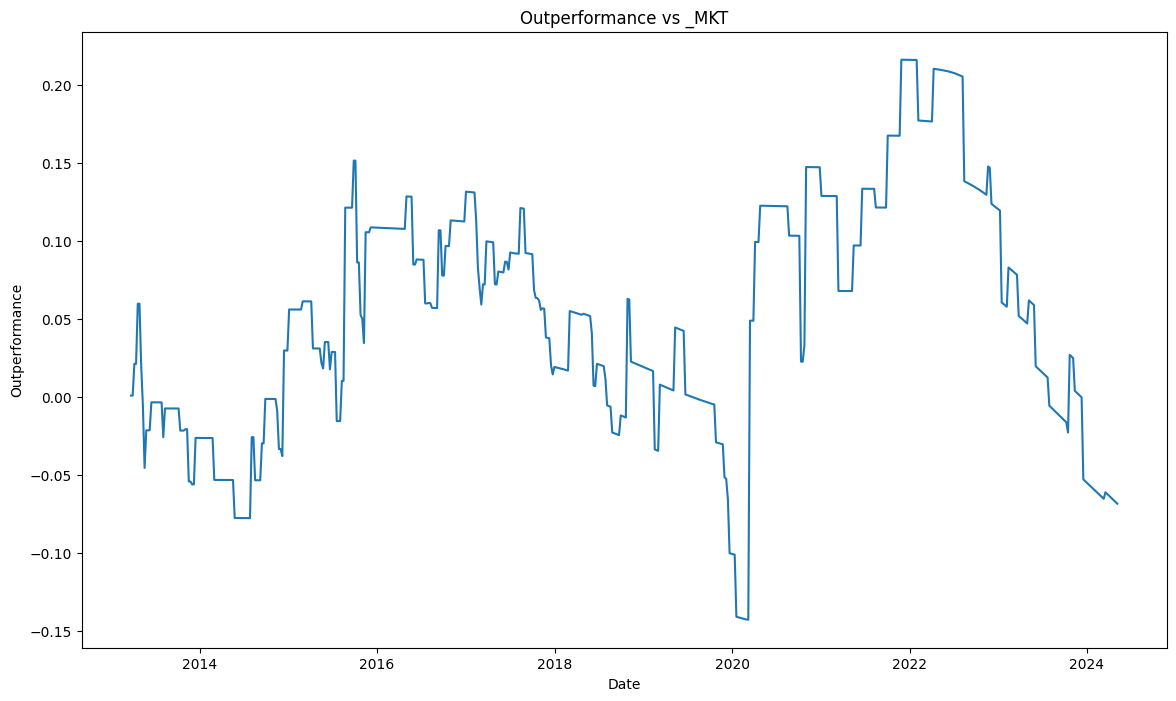

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

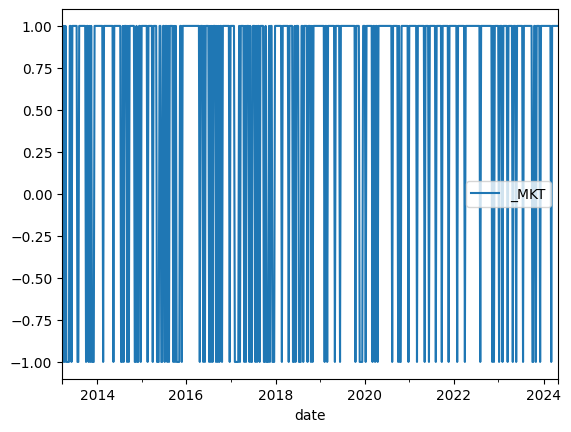

In [11]:
runner.strategy_weights.plot();

In [12]:
(
    (runner.strategy_weights == -1).mean().item(),
    (runner.strategy_weights == 1).mean().item(),
)

(0.22375215146299485, 0.7762478485370051)